In [1]:
import math as m
import numpy as np
import matplotlib as plt
import pandas as pd
import matplotlib.pyplot as pyplt
import cmath as cm
import yfinance as yf


In [2]:
def mw(t,w0) :
    j=(-1)**0.5
    psi=(1/(m.pi)**0.25)*cm.exp(j*w0*t)*cm.exp(-((t*t)/2))
    return psi

In [11]:
data1=yf.download("GOLD",start="2018-01-01",end="2022-01-01")
#data2=yf.download("FCPO",start="2018-01-01",end="2022-01-01")
data2=pd.read_csv("FCPOdata.csv")
odt1=data1["Open"]
odt2=data2["Open"]
date=data2["Date"]
print(data1)
print(data2)

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2018-01-02  14.650000  15.240000  14.610000  15.200000  13.524042  15223200
2018-01-03  15.240000  15.270000  14.740000  15.000000  13.346093  15155900
2018-01-04  15.030000  15.050000  14.790000  15.030000  13.372789   8936100
2018-01-05  14.990000  15.000000  14.870000  14.950000  13.301608   6515600
2018-01-08  14.880000  14.950000  14.640000  14.740000  13.114761   8362600
...               ...        ...        ...        ...        ...       ...
2021-12-27  18.500000  18.580000  18.270000  18.410000  17.634939  11740600
2021-12-28  18.450001  18.670000  18.309999  18.370001  17.596626  10310100
2021-12-29  18.240000  18.660000  18.219999  18.400000  17.625360  17290100
2021-12-30  18.400000  18.889999  18.389999  18.820000  18.027676  13570900
2021-12-31  18.9800

In [15]:
rdt1=[]
#rdt2=[]
n=len(odt1)

for i in range (0,n) :
    if i==0 :
        rdt1.append(0)
        #rdt2.append(0)
    else :
        rdt1.append((odt1[i]-odt1[i-1])/odt1[i-1])
        #rdt2.append((odt2[i]-odt2[i-1])/odt2[i-1])

print(rdt1)
#print(rdt2)

[0, 0.04027304900688325, -0.013779530269085094, -0.0026613414879362736, -0.007338202692249993, -0.016129016752173694, 0.0034152483530064484, -0.0020421874627724553, 0.012278329266664776, 0.03167117669785516, -0.013716527262657659, -0.025165569857020856, -0.020380447370427764, -0.00208042529906155, 0.005559410826781268, 0.04837593616775177, -0.001977569731068873, -0.024438565202692636, -0.008801632390782018, -0.015027340291638028, -0.002773922443924678, -0.007649489276900662, -0.004905441223055527, -0.02676057179895014, -0.018089725435640094, -0.015475316350012116, 0.0037425293427963144, -0.017897074858243173, -0.0022778840392864578, 0.015981737645363658, -0.012734087748035682, 0.03945367921464705, -0.040145999882635404, -0.0114068154282607, -0.0076923370361328125, -0.01937984553432747, -0.015810262078756764, -0.020080321592772482, -0.008196674537606701, -0.030578580790793022, -0.025575383526686132, 0.0061242076076342, 0.0, 0.027826060419497284, 0.0, -0.012690323384353028, 0.00685517765

In [18]:
#normalization test
mean1=np.mean(rdt1)
#mean2=np.mean(rdt2)
n=len(rdt1)

s2_1=0
s3_1=0
s4_1=0
s2_2=0
s3_2=0
s4_2=0



for i in range (n) :
    s2_1+=(rdt1[i]-mean1)**2
    s3_1+=(rdt1[i]-mean1)**3
    s4_1+=(rdt1[i]-mean1)**4
    #s2_2+=(rdt2[i]-mean2)**2
    #s3_2+=(rdt2[i]-mean2)**3
    #s4_2+=(rdt2[i]-mean2)**4
    
    
skew1=(s3_1/n)/(s2_1/n)**1.5
kurt1=(s4_1/n)/(s2_1/n)**2
JB1=(n/6)*(skew1**2+0.25*(kurt1-3)**2)
chi1=s2_1/mean1

#skew2=(s3_2/n)/(s2_2/n)**1.5
#kurt2=(s4_2/n)/(s2_2/n)**2
#JB2=(n/6)*(skew2**2+0.25*(kurt2-3)**2)
#chi2=s2_2/mean2

print('jumlah data =',n)

print('mean data1 =',mean1)
print('skewness data1 =',skew1)
print('kurtosis data1 =',kurt1)
print('JB data1 =',JB1)
print('chi-square data1 =',chi1)

#print('skewness data2 =',skew2)
#print('kurtosis data2 =',kurt2)
#print('JB data2 =',JB2)
#print('chi-square data2 =',chi2)


jumlah data = 1008
mean data1 = 0.0005994330961933126
skewness data1 = -0.18524863840272082
kurtosis data1 = 18.06486791811942
JB data1 = 9537.675572145165
chi-square data1 = 1141.7220619086613


In [17]:
s1=[]
u1=[]
w1=[]
wps1=[]

L=len(cdata)    #banyak data
s0=2      #skala dasar
w0=6      #frekuensi dasar
n=1

while s0**n < L-1 :                             #loop for scale parameter definition
    s=s0**n
    u=1
    while u+s < L :                          #loop for time parameter definition
        w=0
        for t in range (u,u+s+1) :            #calculation loop
            a=(t-(u+0.5*s))/s
            w=w+m.log(cdata[t]/cdata[t-1])*mw(a,w0)/(s)**0.5     #discrete form of continuous wavelet transformation
        wsq=abs(w.imag**2)+abs(w.real**2)               #w squared(|w|^2)
        s1.append(s)
        u1.append(u+0.5*s)
        w1.append(w)
        wps1.append(wsq)
        u=u+s
    n=n+1
            

In [21]:
print("s1")
for i in range (len(s1)) :
    print(s1[i])
print("u1")
for i in range (len(s1)) :
    print(u1[i])
print("w1")
for i in range (len(s1)) :
    print(wps1[i])
    

s1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
16
16
16
16
16
16
16
16
16
16
16
32
32
32
32
32
64
64
128
u1
2.0
4.0
6.0
8.0
10.0
12.0
14.0
16.0
18.0
20.0
22.0
24.0
26.0
28.0
30.0
32.0
34.0
36.0
38.0
40.0
42.0
44.0
46.0
48.0
50.0
52.0
54.0
56.0
58.0
60.0
62.0
64.0
66.0
68.0
70.0
72.0
74.0
76.0
78.0
80.0
82.0
84.0
86.0
88.0
90.0
92.0
94.0
96.0
98.0
100.0
102.0
104.0
106.0
108.0
110.0
112.0
114.0
116.0
118.0
120.0
122.0
124.0
126.0
128.0
130.0
132.0
134.0
136.0
138.0
140.0
142.0
144.0
146.0
148.0
150.0
152.0
154.0
156.0
158.0
160.0
162.0
164.0
166.0
168.0
170.0
172.0
174.0
176.0
178.0
180.0
182.0
184.0
186.0
188.0
3.0
7.0
11.0
15.0
19.0
23.0
27.0
31.0
35.0
39.0
43.0
47.0
51.0
55.0
59.0
63.0
67.0
71.0
75.0
79.0

TypeError: Input z must be a 2D array.

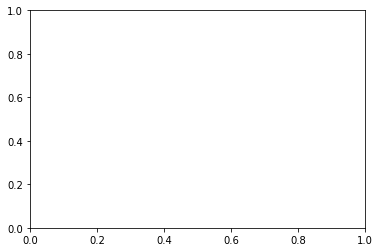

In [13]:
# Creating 2-D grid of features
[X, Y] = np.meshgrid(u1, s1)
  
fig, ax = pyplt.subplots(1, 1)
  
  
# plots filled contour plot
ax.contourf(u1, s1, wps1)
  
ax.set_title('Filled Contour Plot')
ax.set_xlabel('feature_x')
ax.set_ylabel('feature_y')
  
plt.show()

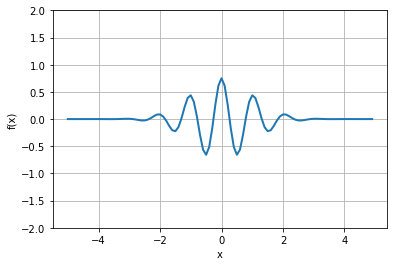

In [4]:
def mwt(t,w0) :
    j=(-1)**0.5
    psi=(1/(cm.pi)**0.25)*cm.exp(j*w0*t)*m.exp(-(0.5*t**2))
    return psi

y = []

w0=6
x=[i*0.1-5 for i in range (0,100)]
for i in range (0,100) :
    mwi=mwt(x[i],w0)
    y.append(mwi)

import matplotlib.pyplot as plt
plt.grid()
plt.ylim(-2,2)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y, '-', lw=2)
plt.show()